# Lecture 11 & 12

## Integration by Trapezoidal Method

The *Trapezoidal Rule* is a numerical method for approximating the definite integral of a function -- instead of calculating the area under the curve exactly, the area is approximated by dividing the region into smaller trapezoids. Here, each slice has width $h = \frac{b - a}{2}$. The RHS of the $k^{\text{th}}$ slice falls at $a + kh$  and the LHS falls at $a + kh - h = a + (k - 1)h$. So, the area of the trapezoid for this slice is 

$A_{k} = \frac{h}{2} \left(f(a + (k - 1)h) + f(a + kj)\right)$.

Now, our approximation for the area under the whole curve is the sum of the areas of the trapezoids for all $N$ slices.

$I(a, b) \approx \sum_{k = 1}^{N} A_k = \frac{h}{2} \sum_{k = 1}^{N} \left(f(a + (k - 1)h) + f(a + kh)\right)$

$= h\left(\frac{f(a)}{2} + f(a + h) + f(a + 2h) + \dots + \frac{f(a)}{2}\right)$

$= \boxed{h\left(\frac{f(a)}{2} + \frac{f(b)}{2} + \sum_{k = 1}^{N - 1} f(a + kh)\right)}$

Here, we are integrating $x^{4} + 2x + 1$

In [15]:
# importing modules and libraries
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def f_int(x):
    return x**4 - 2*x + 1

In [27]:
N, a, b = 200, 0.0, 2.0

In [28]:
def trapezoidal(f_int, a, b, N):
    h = (b - a)/N
    s = 0.5 * f_int(a) + 0.5 * f_int(b)
    for k in range(1, N):
        s += f_int(a + k * h)
    return (h * s)

In [29]:
print(trapezoidal(f_int, a, b, N))

4.400266666


### Convergence for $\sin{(x)}$ and Alternative Algorithm

In [32]:
def f(x):
    return np.sin(x)

In [41]:
def alt_trap(a, b, n, eps, N_max):
    I, p = 0, 0
    h = (b - a)/n
    for p in range (1, (n - 1)):
        I += 2*h*f(a + p*h)
        p += 1
        return h, I
    else:
        I += (0.5*f(a) + 0.5*f(b))*h
        return h, I

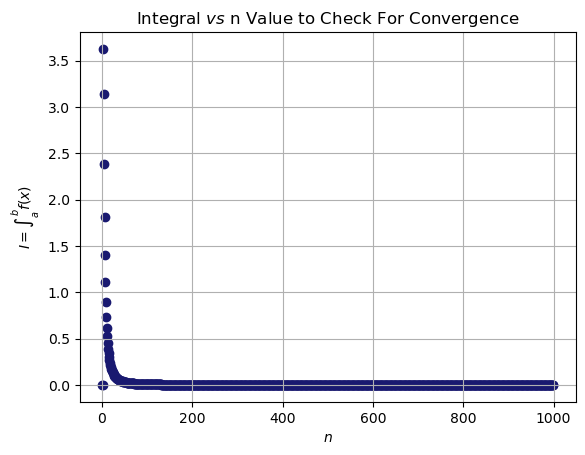

In [42]:
for i in range(1, 1000):
    h_val, I_final = alt_trap(0, 2*np.pi, i, 1e-6, 200)
    plt.scatter(i, I_final, color = 'midnightblue')
plt.title(f'Integral $vs$ n Value to Check For Convergence')
plt.xlabel(r'$n$')
plt.ylabel(r'$I = \int_{a}^{b} f(x)$')
plt.grid(True)
plt.show()

Here, we see that the integral rapidly converges to zero as we increase the number of intervals. We can plot a log-log plot to verify quadratic convergence.

/tmp/ipykernel_8973/666125995.py:4: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(i), np.log(I_final), color = 'turquoise')
/tmp/ipykernel_8973/666125995.py:6: RuntimeWarning: invalid value encountered in log
  log_i.append(np.log(I_final))


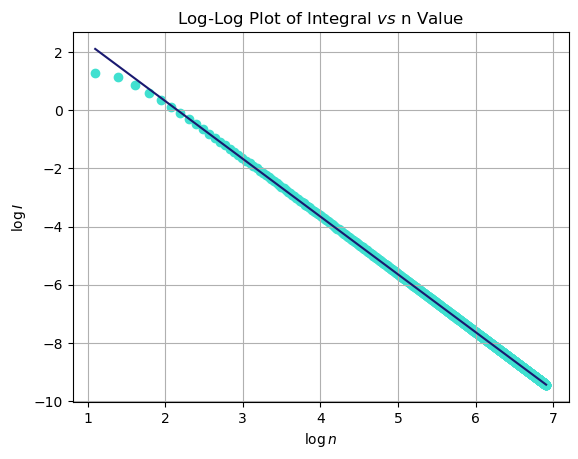

In [43]:
log_i, log_n = [], []
for i in range(1, 1000):
    h_val, I_final = alt_trap(0, 2*np.pi, i, 1e-6, 200)
    plt.scatter(np.log(i), np.log(I_final), color = 'turquoise')
    log_n.append(np.log(i))
    log_i.append(np.log(I_final))
log_n, log_i = np.array(log_n[2:]), np.array(log_i[2:])
m, c = np.polyfit(log_n, log_i, deg = 1)
plt.plot(log_n, m * log_n + c, color = 'midnightblue')
plt.title(f'Log-Log Plot of Integral $vs$ n Value')
plt.xlabel(r'$\log{n}$')
plt.ylabel(r'$\log{I}$')
plt.grid(True)
plt.show()

In [45]:
print('Slope: ', m) # we are getting a slope close to 2 as we expect

Slope:  -1.98740024933833


## Integration by Simpson's Method

Simpson's rule is another method for approximating the definite integral of a function. It provides an approximation to the integral of a function over an interval $[a, b]$, and it is especially effective when the function is well-approximated by a quadratic polynomial over small subintervals. The method is given by the expression

$$ f(x) = \int_{x_{i - 1}}^{x_{i + 1}} f(x) \, dx \approx \frac{h}{3} \left(f(x_{i - 1}) + 4 f(x_i) + f(x_{i + 1}) \right) + O(h^5) $$

where $h$ is the width of each subinterval, which can be defined as $h = \frac{b - a}{n}$, with $n$ being the number of subintervals (which must be even for Simpson’s rule to work properly). $f(x_{i-1}), f(x_i), f(x_{i+1})$ are the function values at the endpoints and the midpoint of the subinterval. The term $O(h^5)$ represents the error, which decreases rapidly as the interval size \( h \) gets smaller (i.e., as the number of subintervals $n$ increases).

Here, we are integration $\log{(x)}$ 

In [9]:
def func_to_int(x):
    return np.log(x)

In [10]:
def simpsons(a, b, N):
    h = (b - a) / N
    x = list()
    fx = list()
    
    i = 0
    while i <= N:
        x.append(a + i * h)
        fx.append(func_to_int(x[i]))
        i += 1

    # calculating result
    res = 0
    i = 0
    while i <= N:
        if i == 0 or i == N:
            res += fx[i]
        elif i % 2 != 0:
            res += 4 * fx[i] # for even terms
        else:
            res += 2 * fx[i] # for odd terms
        i += 1
    res = res * (h/3)
    return res

In [13]:
a, b, N = 4, 5.2, 100
print(simpsons(a, b, N))

1.8278474085728613
